# Capstone Webscrapping using BeautifulSoup

This notebook is developed in order to fulfil Data Analytics Mandatory Task. Mr. Handoyo asked us to scrap USD currency data from web exchange-rate. The final missions are to get daily price combine with its date and plot of the movement of the USD exchange rate.


## Requesting the Data and Creating a BeautifulSoup

First of all, I began with requesting the web from the site with `get` method.

In [47]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly I got from the `request.get`, I utilize .content to check what I exactly got. Below I sliced the output, thus it won't make this notebook display full of the html I got from the page. 

In [48]:
url_get.content[1:296]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta'

It can be seen that I got a very unstructured and complex html, which actually contains the codes needed to show the webpages on the regular web browser. I hardly know which code that can be utilized by only observing those complex codes, thus I picked BeautifulSoup to help me out. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Below I made the Beautiful Soup object.

In [49]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

I did not found any table class, well I just put tbody on below object as a key to scrap the data from the web I mentioned before.

In [50]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   11/26/2020
  </td>
  <td>
   Thursday
  </td>
  <td>
   <a href="/Rate/USD/IDR/11-26-2020">
    14,090.70769
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/IDR/11-26-2020">
    USD IDR rate for 11/26/2020
   </a>
  </td>
 </tr>
 <tr>
  <td>
   11/25/2020
  </td>
  <td>
   Wednesday
  </td>
  <td>
   <a href="/Rate/USD/IDR/11-25-2020">
    14,136.09929
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/U


In [51]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>]

I iniatated a tuple to gathered a collection of data. I made a looping syntax as well, thus whenever I update a new data with new object, it will be automatically appended into the tuple.

In [52]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):

    row = table.find_all('tr')[i]
    
    #tanggal
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #harga harian
    harga = row.find_all('td')[2].text
    harga = harga.strip()
    
    temp.append((date, harga))
    
temp 

[('11/25/2020', '14,136.09929 IDR'),
 ('11/24/2020', '14,137.48161 IDR'),
 ('11/23/2020', '14,185.57119 IDR'),
 ('11/20/2020', '14,162.60519 IDR'),
 ('11/19/2020', '14,165.50144 IDR'),
 ('11/18/2020', '14,051.29503 IDR'),
 ('11/17/2020', '14,040.16051 IDR'),
 ('11/16/2020', '14,085.69501 IDR'),
 ('11/13/2020', '14,142.77143 IDR'),
 ('11/12/2020', '14,141.24303 IDR'),
 ('11/11/2020', '14,073.46024 IDR'),
 ('11/10/2020', '14,053.76135 IDR'),
 ('11/9/2020', '14,283.29667 IDR'),
 ('11/6/2020', '14,214.49744 IDR'),
 ('11/5/2020', '14,389.14027 IDR'),
 ('11/4/2020', '14,544.44634 IDR'),
 ('11/3/2020', '14,589.01774 IDR'),
 ('11/2/2020', '14,612.89990 IDR'),
 ('10/30/2020', '14,629.16216 IDR'),
 ('10/29/2020', '14,701.62361 IDR'),
 ('10/28/2020', '14,701.92586 IDR'),
 ('10/27/2020', '14,649.78960 IDR'),
 ('10/26/2020', '14,652.88010 IDR'),
 ('10/23/2020', '14,655.04157 IDR'),
 ('10/22/2020', '14,647.90877 IDR'),
 ('10/21/2020', '14,641.61060 IDR'),
 ('10/20/2020', '14,555.88071 IDR'),
 ('10/1

## Creating data frame & Data wrangling

Having scrapped the data and extract the information above, I continue to put the array into dataframe using pandas.

In [53]:
import pandas as pd

df = pd.DataFrame(temp, columns= ('date','harga'))
df.head()

,date,harga
0,11/25/2020,"14,136.09929 IDR"
1,11/24/2020,"14,137.48161 IDR"
2,11/23/2020,"14,185.57119 IDR"
3,11/20/2020,"14,162.60519 IDR"
4,11/19/2020,"14,165.50144 IDR"


From the dataframe above, I would like to develop a plot based on daily price and date. I need to check the datatypes to ensure if I could transform it into a plot.

In [54]:
df.dtypes

date     object
harga    object
dtype: object

The original df contains 'harga' with str type, I need to typecast it into a float64 type. To typecast, I need to remove 'IDR' and ','. 

In [55]:
df['harga'] = df['harga'].str.replace("IDR","")
df['harga'] = df['harga'].str.replace(",","")
df['harga'] = df['harga'].astype('float64')
df

,date,harga
0,11/25/2020,14136.09929
1,11/24/2020,14137.48161
2,11/23/2020,14185.57119
3,11/20/2020,14162.60519
4,11/19/2020,14165.50144
...,...,...
140,6/4/2020,14113.82802
141,6/3/2020,14060.78946
142,6/2/2020,14382.27395
143,6/1/2020,14586.73900


In [56]:
df.dtypes

date      object
harga    float64
dtype: object

Now that 'harga' is already a float64 type, I can start to develop a plot.

<AxesSubplot:xlabel='date'>

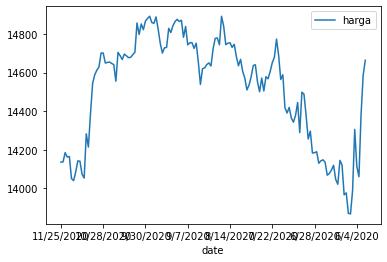

In [57]:
df.plot(x='date', y='harga')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

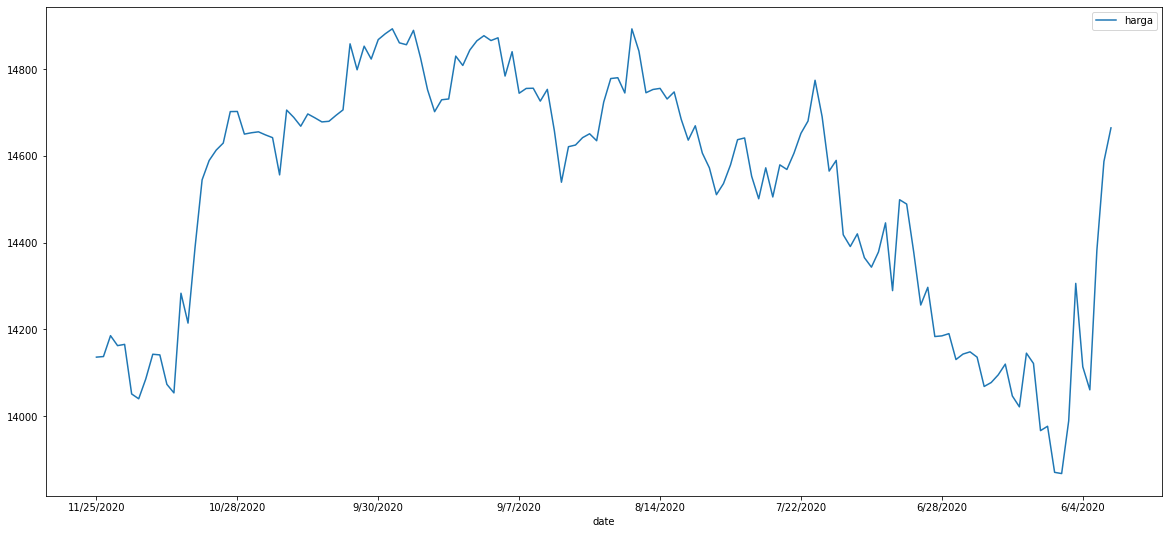

In [38]:
df.plot(x='date', y='harga', figsize = (20,9))

From the above graph, we can see that the highest rates were around August to September 2020. USD rates dropped early of November and since then, we can not see any significant increasement. For those who happen to link their savings into USD, better not to sell or exchange to IDR. Unless you love Indonesia that much and would like to improve IDR value.